<a href="https://colab.research.google.com/github/Fordfire337/CS-4410-intro-machine-learning/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Q1: Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
#Q2: Hyperparameter tuning with cross_val_score(cv=10)
k_range = range(1, 31)
mean_scores = []
std_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

mean_scores = np.array(mean_scores)
std_scores = np.array(std_scores)

best_k = int(np.argmax(mean_scores) + 1)  # +1 because k starts at 1
best_acc = mean_scores[best_k - 1]

print(f"Best k from cross_val_score(cv=10): {best_k}")
print(f"Best cross-validated accuracy: {best_acc:.4f}")

Best k from cross_val_score(cv=10): 13
Best cross-validated accuracy: 0.9800


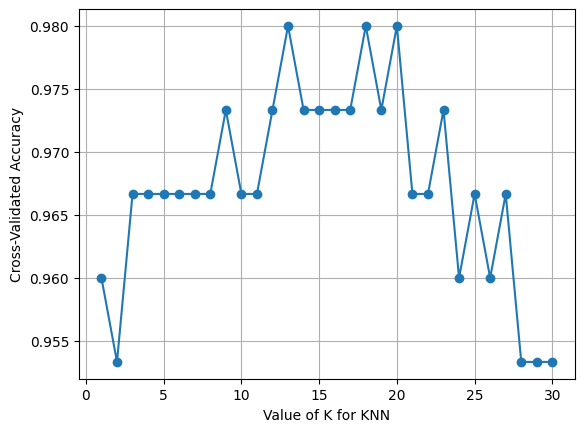

In [18]:
#Q3 Plot 1: Value of K for KNN vs Cross-Validated Accuracy
plt.figure()
plt.plot(list(k_range), mean_scores, marker='o')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.savefig("knn-1.jpg", dpi=300, bbox_inches="tight")
plt.show()

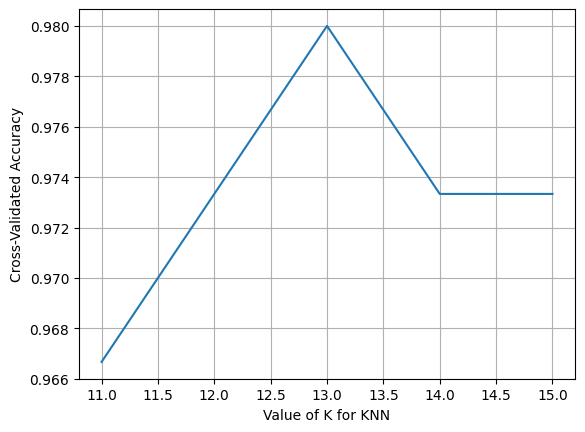

In [19]:
#Q3 Plot 2
k_zoom = np.arange(11, 16)
idx = k_zoom - 1                # indices 10-14

plt.figure()
plt.plot(k_zoom, mean_scores[idx])
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.savefig("knn2-1.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
# 4) GridSearchCV to confirm the optimal k
param_grid = {"n_neighbors": list(range(1, 32))}
grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=10,
    scoring="accuracy"
)

grid.fit(X, y)

print("GridSearchCV best k:", grid.best_params_["n_neighbors"])
print(f"GridSearchCV best accuracy: {grid.best_score_:.4f}")

GridSearchCV best k: 13
GridSearchCV best accuracy: 0.9800
